#### In this example, we continue to drill a bit futher into the use of scikit-learn for classification, as well as the use of cross-validation for evaluation model performance.

In [1]:
import numpy as np
import pandas as pd

In [2]:
vstable = pd.read_csv("http://facweb.cs.depaul.edu/mobasher/classes/csc478/data/Video_Store_2.csv", index_col=0)

vstable.shape

(50, 7)

In [3]:
vstable.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre,Incidentals
Cust ID,,,,,,,
1,M,45000,25,32,2.5,Action,Yes
2,F,54000,33,12,3.4,Drama,No
3,F,32000,20,42,1.6,Comedy,No
4,F,59000,70,16,4.2,Drama,Yes
5,M,37000,35,25,3.2,Action,Yes


#### Let's separate the target attribute and the attributes used for model training

In [4]:
vs_records = vstable[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']]
vs_records.head()

,Gender,Income,Age,Rentals,Avg Per Visit,Genre
Cust ID,,,,,,
1,M,45000,25,32,2.5,Action
2,F,54000,33,12,3.4,Drama
3,F,32000,20,42,1.6,Comedy
4,F,59000,70,16,4.2,Drama
5,M,37000,35,25,3.2,Action


In [5]:
vs_target = vstable.Incidentals
vs_target.head()

Cust ID
1    Yes
2     No
3     No
4    Yes
5    Yes
Name: Incidentals, dtype: object

#### As before, we use Pandas "get_dummies" function to create dummy variables. 

In [6]:
vs_matrix = pd.get_dummies(vs_records[['Gender','Income','Age','Rentals','Avg Per Visit','Genre']])
vs_matrix.head(10)

,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
1,45000,25,32,2.5,0,1,1,0,0
2,54000,33,12,3.4,1,0,0,0,1
3,32000,20,42,1.6,1,0,0,1,0
4,59000,70,16,4.2,1,0,0,0,1
5,37000,35,25,3.2,0,1,1,0,0
6,18000,20,29,1.7,0,1,1,0,0
7,29000,45,19,3.8,1,0,0,0,1
8,74000,25,31,2.4,0,1,1,0,0
9,38000,21,18,2.1,0,1,0,1,0


#### Next, we divide the data into randomized training and test partitions (note that the same split should also be perfromed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation". 

In [7]:
from sklearn.model_selection import train_test_split
vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix, vs_target, test_size=0.2, random_state=33)

print(vs_test.shape)
vs_test[0:5]

(10, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
6,18000,20,29,1.7,0,1,1,0,0
28,57000,52,22,4.1,0,1,0,1,0
38,41000,38,20,3.3,0,1,0,0,1
16,17000,19,26,2.2,0,1,1,0,0
41,50000,33,17,1.4,1,0,0,0,1


In [8]:
print(vs_train.shape)
vs_train[0:5]

(40, 9)


,Income,Age,Rentals,Avg Per Visit,Gender_F,Gender_M,Genre_Action,Genre_Comedy,Genre_Drama
Cust ID,,,,,,,,,
30,41000,25,17,1.4,0,1,1,0,0
35,74000,29,43,4.6,0,1,1,0,0
18,6000,16,39,1.8,1,0,1,0,0
40,17000,19,32,1.8,0,1,1,0,0
2,54000,33,12,3.4,1,0,0,0,1


#### Let's try KNN Classifier - Note that in this example we did not normalize the data.

In [9]:
from sklearn import neighbors, tree, naive_bayes

#### First, we'll use KNN classifer. You can vary K and monitor the accuracy metrics (see below) to find the best value.

In [10]:
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(vs_train, vs_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

#### Next, we call the predict function on the test intances to produce the predicted classes.

In [11]:
knnpreds_test = knnclf.predict(vs_test)

In [12]:
print(knnpreds_test)

['No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No']


In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(vs_target_test, knnpreds_test))

              precision    recall  f1-score   support

          No       0.40      0.50      0.44         4
         Yes       0.60      0.50      0.55         6

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.52      0.50      0.51        10



In [15]:
print(knnclf.score(vs_test, vs_target_test))

0.5


In [16]:
print(knnclf.score(vs_train, vs_target_train))

1.0


#### You may notice that accuracy on test data is much lower than in part 1 of this example (previous notebook) when the data was normalized and rescaled. This may indicate that normalization in KNN is very important to improve performance and to avoid overfitting.

#### Next, let's use a decision tree classifier:

In [17]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(vs_train, vs_target_train)

In [18]:
print(treeclf.score(vs_test, vs_target_test))

0.6


In [19]:
print(treeclf.score(vs_train, vs_target_train))

0.95


#### Now, let's try Gaussian and Multinomial Naive Bayes classifiers:

In [20]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(vs_train, vs_target_train)
print("Score on Training: ", nbclf.score(vs_train, vs_target_train))
print("Score on Test: ", nbclf.score(vs_test, vs_target_test))

Score on Training:  0.675
Score on Test:  0.8


In [21]:
nbmclf = naive_bayes.MultinomialNB()
nbmclf = nbclf.fit(vs_train, vs_target_train)
print("Score on Training: ", nbmclf.score(vs_train, vs_target_train))
print("Score on Test: ", nbmclf.score(vs_test, vs_target_test))

Score on Training:  0.675
Score on Test:  0.8


#### Finally, let's try linear discriminant analysis:

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(vs_train, vs_target_train)
print("Score on Training: ", ldclf.score(vs_train, vs_target_train))
print("Score on Test: ", ldclf.score(vs_test, vs_target_test))

Score on Training:  0.725
Score on Test:  0.9


C:\Users\Bamshad\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


#### Let's explore various decision tree parameters and also the use of cross-validation for evaluation:

In [24]:
import graphviz

In [25]:
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score

In [26]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy')

In [27]:
cv_scores = cross_val_score(treeclf, vs_train, vs_target_train, cv=5)
cv_scores

array([0.75 , 0.625, 0.375, 0.5  , 0.25 ])

In [28]:
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy on X-Val: 0.50 (+/- 0.35)


In [29]:
treeclf = treeclf.fit(vs_train, vs_target_train)
print("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

Accuracy on Training:  1.0


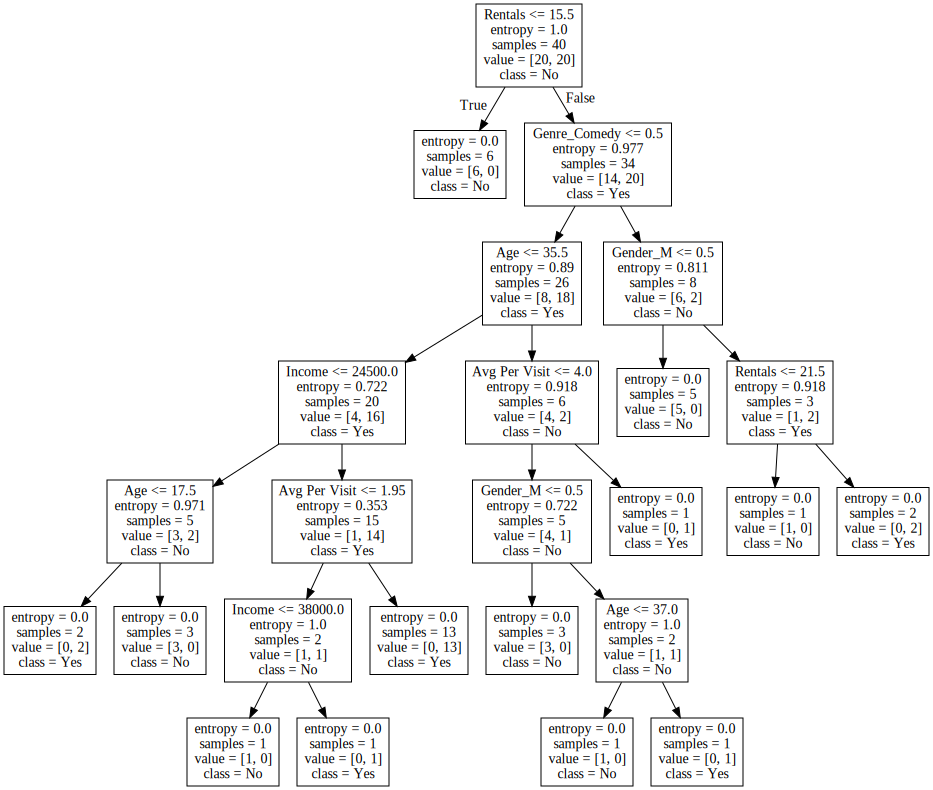

In [30]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### We can obtain summary results on how informative are each of the features in the data:

In [31]:
print("Feature Importances:\n{}".format(treeclf.feature_importances_))

Feature Importances:
[0.15708547 0.25147997 0.23806704 0.13001311 0.         0.13362445
 0.         0.08972995 0.        ]


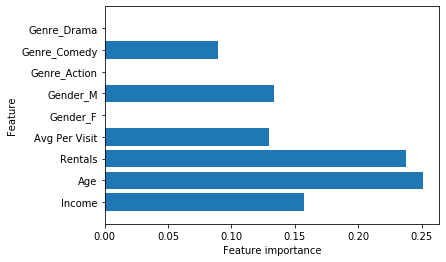

In [32]:
import pylab as plt
%matplotlib inline

def plot_feature_importances(model, n_features, feature_names):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(treeclf, len(vs_matrix.columns), vs_matrix.columns)

#### The above evaluation results indicate overfitting. Pruning the tree may help in reducing overfitting.

In [33]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
cv_scores = cross_val_score(treeclf, vs_train, vs_target_train, cv=5)
print(cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(vs_train, vs_target_train)
print("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

[0.875 0.75  0.5   0.5   0.125]
Overall Accuracy on X-Val: 0.55 (+/- 0.51)
Accuracy on Training:  0.85


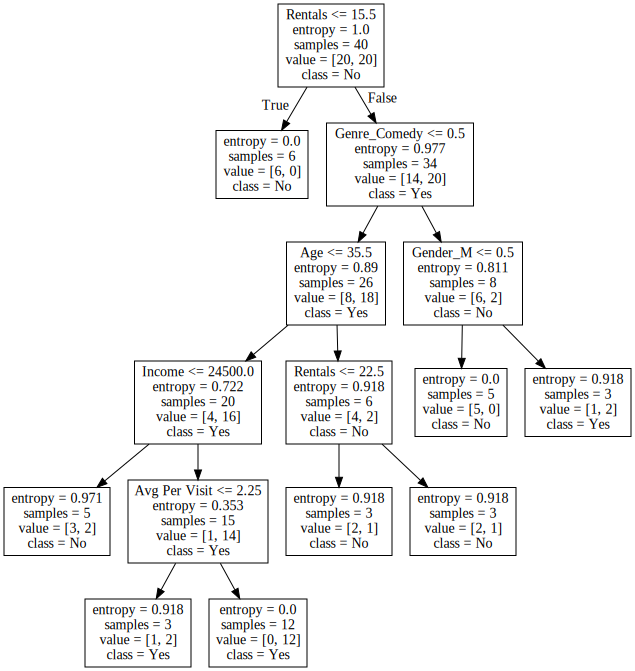

In [34]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [36]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
cv_scores = cross_val_score(treeclf, vs_train, vs_target_train, cv=5)
print(cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(vs_train, vs_target_train)
print("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

[0.75  0.625 0.625 0.375 0.125]
Overall Accuracy on X-Val: 0.50 (+/- 0.45)
Accuracy on Training:  0.9


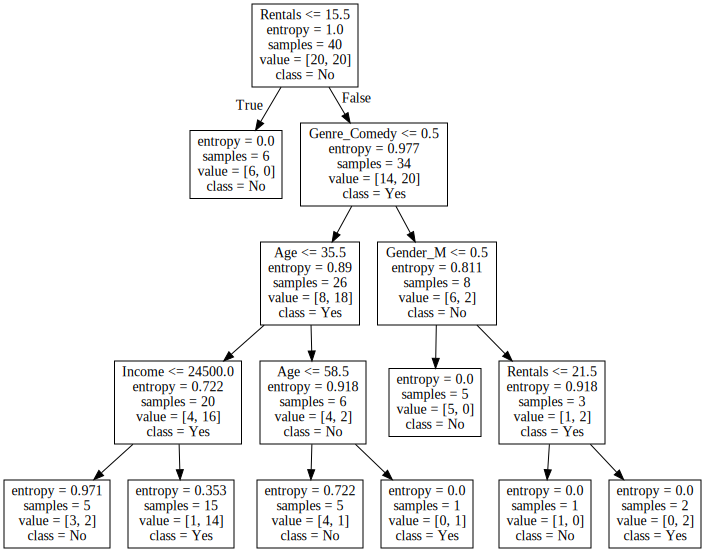

In [39]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"])

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [37]:
treeclf = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=3, max_depth=4)
cv_scores = cross_val_score(treeclf, vs_train, vs_target_train, cv=5)
print(cv_scores)
print("Overall Accuracy on X-Val: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

treeclf = treeclf.fit(vs_train, vs_target_train)
print("Accuracy on Training: ",  treeclf.score(vs_train, vs_target_train))

[0.625 0.75  0.75  0.75  0.375]
Overall Accuracy on X-Val: 0.65 (+/- 0.29)
Accuracy on Training:  0.85


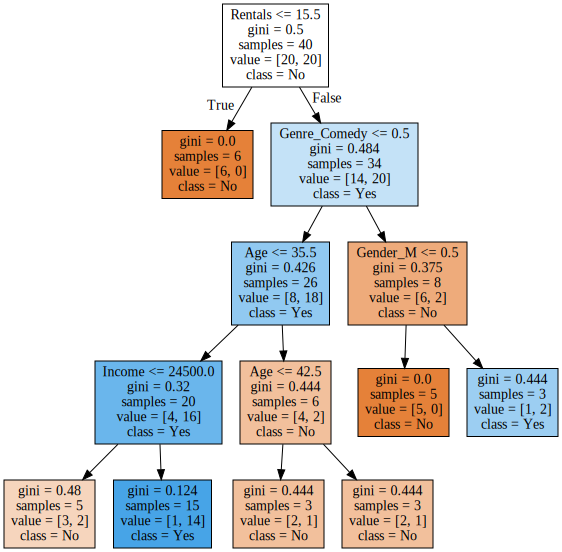

In [38]:
export_graphviz(treeclf,out_file='tree.dot', feature_names=vs_train.columns, class_names=["No","Yes"], filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)